In [1]:
# ============================== loading libraries ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
# =============================================================================================

In [2]:
# Part I
# ============================== data preprocessing ===========================================

# define column names
names = ['x', 'y', 'class']

# loading training data
df = pd.read_csv('C:\\VipinML\\InputData\\demo_data\\3.concertriccir2.csv', header=None, names=names)
print(df.head())

# create design matrix X and target vector y
X = np.array(df.iloc[:, 0:3]) # end index is exclusive
y = np.array(df['class']) # showing you two ways of indexing a pandas df


          x         y  class
0  0.700335 -0.247068    0.0
1 -3.950019  2.740080    1.0
2  0.150222 -2.157638    1.0
3 -1.672050 -0.941519    1.0
4  2.560483 -1.846577    1.0


### Simple Cross Validation 

In [3]:
# split the data set into train and test
# Break up the data as you see test data to 30%, train data is 70%. so we break data into two matrix. 
# x1 and y1 would be 70% as train data and x-test and y_test will be test data as 30%.

X_1, X_test, y_1, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = model_selection.train_test_split(X_1, y_1, test_size=0.3)

for i in range(1,30,2):  # taking only odd numbers.  1,3,5...
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i) # Number of nearest neighbor is i.

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)  # predicting the value using cross validation data. 

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)  # I get the accuracy score. 
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    
# We are doing the same thing on test data what we did  above to find accuracy. 
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))


CV accuracy for k = 1 is 100%

CV accuracy for k = 3 is 100%

CV accuracy for k = 5 is 100%

CV accuracy for k = 7 is 99%

CV accuracy for k = 9 is 99%

CV accuracy for k = 11 is 99%

CV accuracy for k = 13 is 96%

CV accuracy for k = 15 is 94%

CV accuracy for k = 17 is 91%

CV accuracy for k = 19 is 89%

CV accuracy for k = 21 is 83%

CV accuracy for k = 23 is 80%

CV accuracy for k = 25 is 77%

CV accuracy for k = 27 is 73%

CV accuracy for k = 29 is 73%

****Test accuracy for k = 1 is 100%


### 10 fold cross validation 


The optimal number of neighbors is 1.


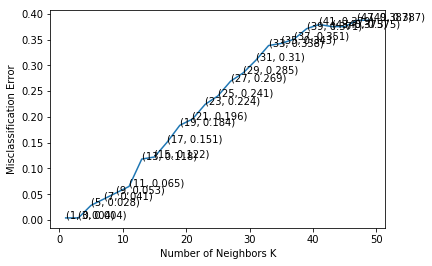

the misclassification error for each k value is :  [0.004 0.004 0.028 0.041 0.053 0.065 0.118 0.122 0.151 0.184 0.196 0.224
 0.241 0.269 0.285 0.31  0.338 0.343 0.351 0.371 0.379 0.375 0.375 0.387
 0.387]


In [4]:

# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList)) # 1,3,5,7.. neighbors. 

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation since cv =10, 10 is 10 folds. and then I calculate avg score. 
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X_tr, y_tr, cv=3, scoring='accuracy') # what is the classifier I want to use. it is knn from above.
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k out of all from 1,3,5...49
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

# accuracy and error plots are totally opposite.

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [5]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_tr, y_tr)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 1 is 100.000000%
